This is an attempt to manually code up the linear regression algorithm in the following constraints:
- Only one feature is catered to for now.
- It will use Batch Gradient Descent.

In [412]:
import numpy as np
import matplotlib.pyplot as plt

The following will be our way of generating the sample data for our linear regression.

In [413]:
np.random.seed(43) # We will set a seed to generate deterministic data
m = 100 # This is the number of data rows we will generate
x = 2 * np.random.rand(m, 1) # This is to set the x values
y = 4 + 3 * x + np.random.randn(m, 1) # As y is usually an output from f(x), it is dependent on the x

We can generate a scatter plot to visualize the generated data.

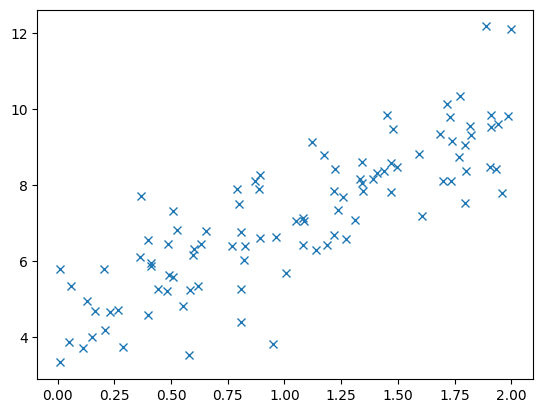

In [414]:
plt.plot(x, y, 'x')

First, let's settle how we will generate the hypothesis.

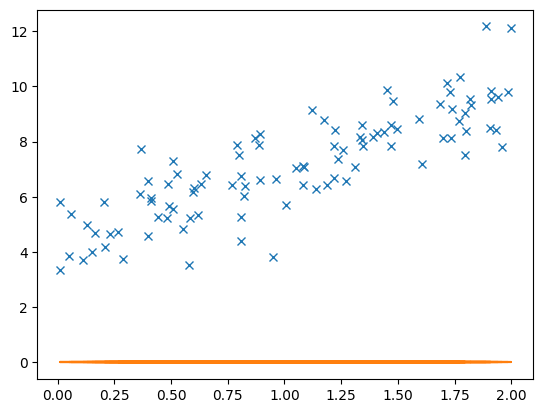

In [415]:
# Initialize the slope array
# These will be our parameters or thetas
slope = np.array([0.0, 0.0])

# plot sample scatter plot with linear regression
plt.plot(x, y, 'x')
plt.plot(x, slope[1]*x+slope[0])

In [416]:
def hypothesis(x):
    return slope[0] + slope[1] * x # 1 is the intercept, then we start on the zero line.

# A function to return the partial derivative value
def partial_derivative(j):
    if j == 0:
        return 1
    return x[j]

def cost_function(j):
    counter = 0

    summation = 0

    while counter < len(x):
        summation += (hypothesis(x[counter]) - y[counter]) * partial_derivative(j)
        counter += 1

    # this is the value of J(theta) or the cost function. 
    # We include the 2 which will be multiplied again later when we take the derivative.
    return summation / m 

Now that we have the cost function, we can try to compute for the partial derivatives with respect to the intercept and slope.

C:\Users\Hans\AppData\Local\Temp\ipykernel_30972\4232012999.py:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  slope[i] = slope[i] - (0.01 * cost_function(i))


Number of Iterations: 391


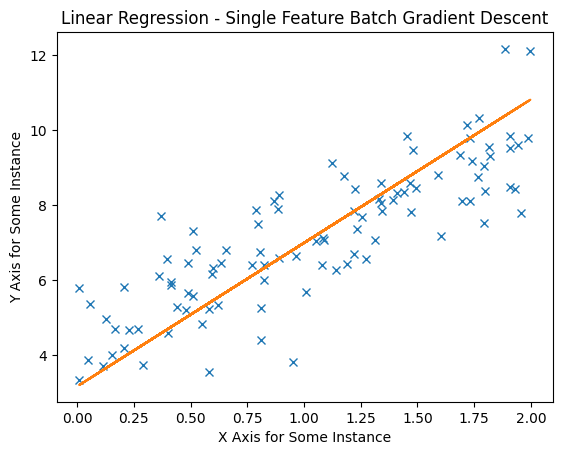

In [417]:
prev_slope = np.copy(slope)
iterations = 0

while True:
    for i in range(len(slope)):
        slope[i] = slope[i] - (0.01 * cost_function(i))

    # If the difference between the values are converging (I just assumed that 0.00001 is already a good converging point).
    # Then we can stop iterating on our BGD
    if abs(slope[0] - prev_slope[0]) < 0.00001:
        break

    prev_slope = np.copy(slope)
    iterations += 1

# plot sample scatter plot with linear regression
plt.plot(x, y, 'x')
plt.plot(x, slope[1]*x+slope[0])

plt.title("Linear Regression - Single Feature Batch Gradient Descent")
plt.xlabel("X Axis for Some Instance")
plt.ylabel("Y Axis for Some Instance")
print(f"Number of Iterations: {iterations}")